![title](img/keras_logo.png)

## Introduction


##### KERAS INTRODUCTION #####

Keras is a high level, deep learning API written in Python. It was developed by Google for implementation of neural networks[1]. Its primary author is François Chollet. Keras is considered slower than other deep learning frameworks but more user friendly.
Frameworks supported by Keras are Tensorflow, Theano, PlaidML, MXNet, CNTK (Microsoft Cognitive Toolkit). [2]


![title](img/BackEnd.png)

TensorFlow has made Keras its official high-level API and Keras and it is embedded in TensorFlow.

#### TensorFlow ####

TensorFlow is an open source, end to end framework for machine learning and use in artificial intelligence. Developed by Google, TensorFlow can be used with multiple programming languages including Python, Java & C ++ leading to its use in many applications.

TensorFlow has many features, among them it's ability to work efficiently with mathematical formulas involving multi-dimensional arrays. It also has strong support for nueral networks and machine learning concepts which I will speak about further below. [4]

## Anomaly Detection ##

Anomaly detection in computer science is the process of indentifying unusual or unexpected results/observations that differ from the norm in a dataset.

Real world examples of why anomaly detection is important would be is to detect fraud in the financial industry. A sudden increase in transactions or transaction amounts could be indication of fraud. 

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [1]:
# Importing Numpy for numerical arrays

import numpy as np

# Importing Pandas for creating dataframes

import pandas as pd

# Importing Keras from tensorflow library - Neural Networks

from tensorflow import keras

# Importing layers of Neural Networks

from tensorflow.keras import layers

# Importing pyplot for plotting figures

from matplotlib import pyplot as plt


## Loading the Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

The Keras model is using data from the Numenta Anomaly Benchmark (NAB) dataset. The (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source.

The below model uses two of these datasets - art_daily_small_noise.csv & art_daily_jumpsup.csv.

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'



In [3]:
# Can check that your URL the root & file url have combined. Copy URL to look at raw data.
no_anomaly_url


'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
# Can check that your URL the root & file url have combined. Copy URL to look at raw data.
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# Reading in both datasets using pandas using "timestamp" as our Index column

df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

#### No Anomaly #### 

Taking a look at some summary stats and plotting graphs on the first dataset. We will do this with the anomaly dataset too. 

Purpose is to 'sense check' the data so we know we are working with a proper data set.

In [6]:
# Print data without anomaly. Defaults to first 5 rows but this can be changed by inserting a number.

print(df_small_noise.head()) 


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120


In [7]:
# Using Pandas'shape' attribute to get the shape of the data.

df_small_noise.shape

(4032, 1)

4032 rows & 1 column

In [8]:
# Getting descriptive stats - No anomaly

df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The 'describe' function gives a overview of the data in the file.

Count - # of rows of data.

Mean - The average value.

STD - Standard deviation of the values.

Min - Minimum value observed.

Percentiles - 25, 50 & 75. 50 is the same as the median. From the above, we can see that 25% of values are 19.841 or lower. 75 % of values are 75.450 or lower.

Max - The maximum observed value.



In [9]:
# Plotting Data - No anomaly

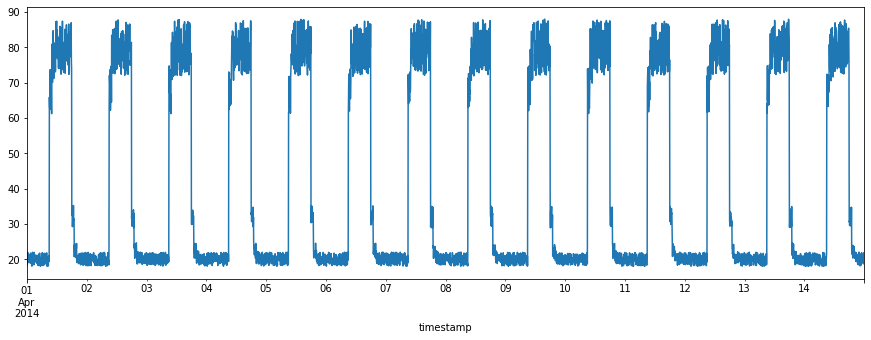

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()


#### With Anomaly ####

Taking a look at some summary stats and plotting graphs on the second dataset

In [11]:
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [12]:
df_daily_jumpsup.shape

(4032, 1)

Again, 4032 rows & 1 column


In [13]:
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


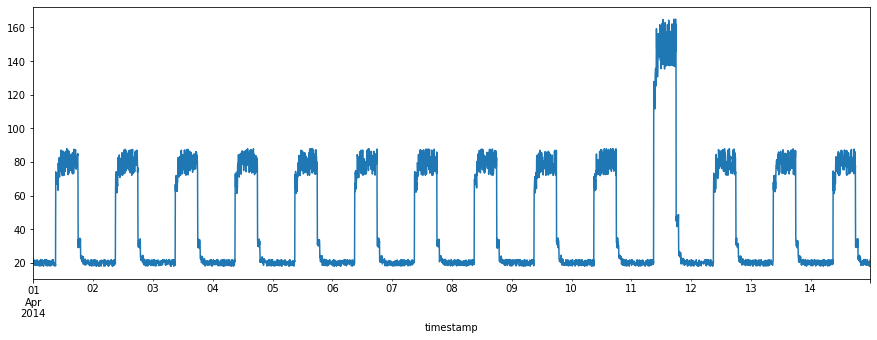

In [14]:
# Plotting the data and adjusting the fig size for easier viewing.

fig, ax = plt.subplots(figsize = (15,5))

#Legend = false as "value" adds little

df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


Using the same functions as we did on the dataset without an anomaly, we can see the difference most clearly in the graph above.  The values between the 11th & 12th are clearly out of sync with the other dates.

## Preprocessing

Here we are preparing the model training data by 'Normalizing' it. Data pre-processing is the process of manipulating or removing data before using it in a model to improve performance. 

There are many reasons this is done. For example, your dataset may contain duplicate values, missing or incomplete data - all of which can affect performance. [7]

In [15]:
# Creating a new variable (train_mean) to store mean without anomaly. Will be used for comparison later
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [16]:
# Creating a new variable (train_std) to store STD without anomaly
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [17]:
# To establish the spread of values centered around 0, the mean is subtracted from the pop. & divided by the STD. In effect, scaling the data.

df_train_vals = (df_small_noise - train_mean) / train_std



In [18]:
# Prints the first 5 (by default again) rows of the variation spread
df_train_vals.head()



,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


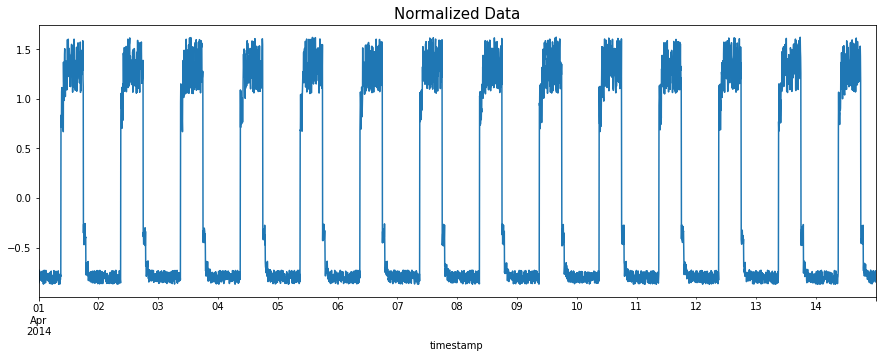

In [19]:
# Plotting these values

fig, ax = plt.subplots(figsize = (15,5))
df_train_vals.plot(legend=False, ax=ax)
plt.title('Normalized Data', fontsize=15)
plt.show()


In [20]:
# Creating two new columns ("less_mean & "less_std") showing the difference between the orginal value
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()



In [21]:
# Print out with new columns
df_small_noise


,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [22]:
#Print out mean stats on new columns

df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [23]:
#Printing out STD stats on new columns

df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)


#### Creating Sequences using Windows

In [24]:
# Getting the shape of the training values dataframe. Once again its 4032
df_train_vals.shape

(4032, 1)

In [25]:
# 288 comes from the # of timesteps per day. Every 5 minutes for 24 hours.
window_size = 288

In [26]:
# Defining Windows/training sequence
def windows(vals, N=window_size):
  # Strating with an empty list
  L = []
  # Loop through all possible Windows
  for i in range(len(vals) - N + 1):
    # Append window to the list
    L.append(vals[i:i+N])
  # Then stack the windows using numpy stack
  return np.stack(L)

In [27]:
# Calling the windows function to create sequences using df_train_vals
x_train = windows(df_train_vals)

In [28]:
# Printing out the first & last value, another sense check.
x_train[0][0], x_train[0][-1]



(array([-0.85882857]), array([-0.79671155]))

In [29]:
# Using pandas iloc to verify that the window 'works'
df_train_vals.iloc[0], df_train_vals.iloc[window_size-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.796712
 Name: 2014-04-01 23:55:00, dtype: float64)

In [30]:
# Getting the shape
x_train.shape

(3745, 288, 1)

In [31]:
#Printing out just the 'value' column from data frame. Remove ".values" to see full table
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [32]:
# Flatten converts all into a one dimensional array for input
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

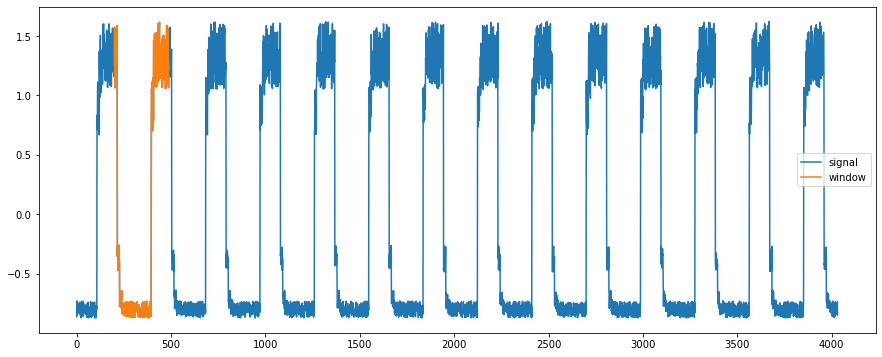

In [33]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(15, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();



#### Neural Network

In machine learning, neural networks use computer science and statistics to replicate the human brain and try to solve common problems in the field of artificial intelligence. 

They are a key component of deep learning algorithms. Neural networks consist of Node Layers which in turn are made up of - an input layer, one or multiple hidden layers and an output layer.

Considered vital tools in computer science and artificial intelligence, they rely on training data to improve over time, similar to our own brains.[5] 

![title](img/ANN.png)

In [34]:
# x-train shape. 3745 values in 288 windows and one layer
x_train.shape


(3745, 288, 1)

In [35]:
x_train.shape[2]

1

In [36]:
# Create layers
layers = [
  #Input with 288 windows(x_train.shape[1]) and one layer (x_train.shape[2])
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Dropout rate is used to randomly ''drop'' data to avoid 'overfitting' the model. Overfitting being analysis produced that alines too closely to a dataset and therefore fails to predict future observations in a relaible manner.
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]



In [37]:
# Creatin model with layer defined above
model = keras.Sequential(layers)



In [38]:
# Using Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)



In [39]:
# MSE - Mean Squared Error - Computes the mean squared error between labels and predictions
model.compile(optimizer=optimizer, loss="mse")



In [40]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [41]:
# Running the model
history = model.fit(
    # x_train passed as both input & output. Telling the model that it expected to output the same data
    x_train,
    x_train,
    # The number of times the model will work through the datasets
    epochs=50,
    # Batch size is the number of training samples used at a time. ie) runs the first 128 then the next 128 etc
    batch_size=128,
    # Validation split allows a portion of the training data per epoch to be split into a seperate dataset for evaluation. In this case 10%
    validation_split=0.1,
    # Callbacks are used when performance has decreased on a metric
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)



Epoch 1/50
27/27 [==============================] - 5s 97ms/step - loss: 0.5219 - val_loss: 0.0901
Epoch 2/50
27/27 [==============================] - 2s 68ms/step - loss: 0.0775 - val_loss: 0.0411
Epoch 3/50
27/27 [==============================] - 2s 73ms/step - loss: 0.0573 - val_loss: 0.0354
Epoch 4/50
27/27 [==============================] - 2s 75ms/step - loss: 0.0502 - val_loss: 0.0312
Epoch 5/50
27/27 [==============================] - 3s 96ms/step - loss: 0.0454 - val_loss: 0.0289
Epoch 6/50
27/27 [==============================] - 2s 77ms/step - loss: 0.0413 - val_loss: 0.0268
Epoch 7/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0378 - val_loss: 0.0246
Epoch 8/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0345 - val_loss: 0.0228
Epoch 9/50
27/27 [==============================] - 2s 62ms/step - loss: 0.0314 - val_loss: 0.0212
Epoch 10/50
27/27 [==============================] - 2s 73ms/step - loss: 0.0289 - val_loss: 0.0197
Epoch 11/

## Evaluation

In [42]:
# Training Loss

history.history["loss"]

[0.5219100117683411,
 0.07752618193626404,
 0.057273171842098236,
 0.05021161213517189,
 0.045360174030065536,
 0.0413229838013649,
 0.03775874897837639,
 0.03446746617555618,
 0.0313829742372036,
 0.02887418307363987,
 0.026788465678691864,
 0.024804692715406418,
 0.023384077474474907,
 0.02198708802461624,
 0.02074967324733734,
 0.019676946103572845,
 0.018737060949206352,
 0.017920875921845436,
 0.017114032059907913,
 0.01652252860367298,
 0.01586623303592205,
 0.015301389619708061,
 0.01478551235049963,
 0.014263411983847618,
 0.01375636924058199,
 0.013281055726110935,
 0.012880409136414528,
 0.012365016154944897,
 0.01201765239238739,
 0.011602585203945637,
 0.011228115297853947,
 0.010777642950415611,
 0.010513493791222572,
 0.010196559131145477,
 0.009897102601826191,
 0.009589009918272495,
 0.009285308420658112,
 0.009063865058124065,
 0.008836548775434494,
 0.008613425306975842,
 0.00841961894184351,
 0.008207867853343487,
 0.008056520484387875,
 0.007897601462900639,
 0.0077

In [43]:
# Validation Loss

history.history["val_loss"]

[0.09010373055934906,
 0.041107431054115295,
 0.03538324311375618,
 0.031185496598482132,
 0.028923673555254936,
 0.026797635480761528,
 0.02457011491060257,
 0.022808866575360298,
 0.021159594878554344,
 0.019669674336910248,
 0.01922924630343914,
 0.017767876386642456,
 0.01757485792040825,
 0.016759349033236504,
 0.016946835443377495,
 0.01612541638314724,
 0.015225567854940891,
 0.01618141122162342,
 0.015186748467385769,
 0.01388836931437254,
 0.013696698471903801,
 0.012679868377745152,
 0.013756741769611835,
 0.011660787276923656,
 0.010860561393201351,
 0.011297902092337608,
 0.011250920593738556,
 0.011612432077527046,
 0.010382195934653282,
 0.010207085870206356,
 0.009608137421309948,
 0.00963110476732254,
 0.009080629795789719,
 0.008781756274402142,
 0.008342403918504715,
 0.008693279698491096,
 0.008688322268426418,
 0.007865170948207378,
 0.00806067232042551,
 0.007383174728602171,
 0.007210185285657644,
 0.007301138713955879,
 0.0068607451394200325,
 0.00634513096883893

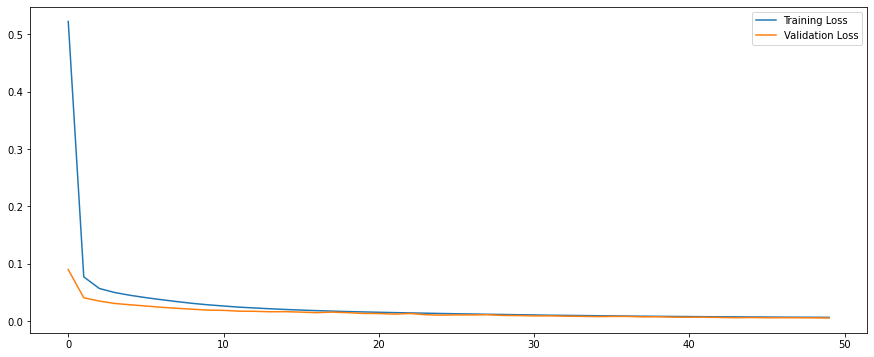

In [44]:
# Plotting Training v Vailidation loss

fig, ax = plt.subplots(figsize=(15, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();


Training loss is how the overall dataset fit the model created. The validation loss is the sub-set created by the 'Validation_split'. We can see in the above diagram that for the first 2 - 3 epochs, there is a significant difference in the runs. The begin to align more closely in the next 10 runs before becoming merging into the same pattern.

In [45]:
# Get train MAE loss. Stands for Mean absolute error, calculated as the difference between the actual and predicted values
x_train_pred = model.predict(x_train)



118/118 [==============================] - 1s 8ms/step


In [46]:
# The actual calculation. Using numpy absolute value
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)



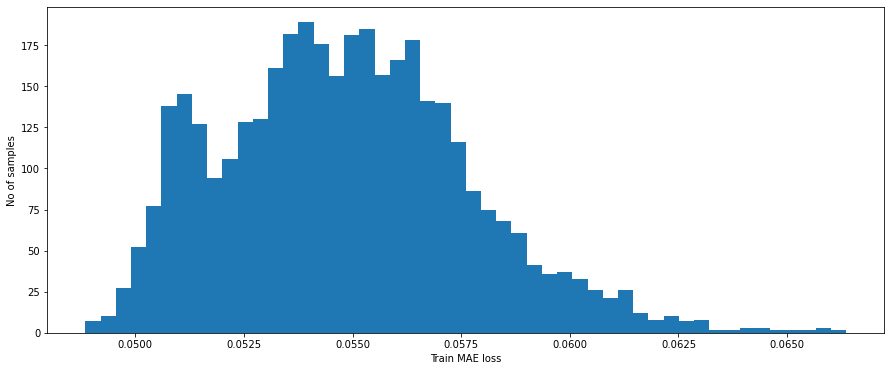

In [47]:
# 
fig, ax = plt.subplots(figsize=(15, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");



In [48]:
# Get reconstruction loss threshold. This is the largest MAE difference between the original and predicted datasets.
threshold = np.max(train_mae_loss)

# Print
threshold


0.06636167871674035

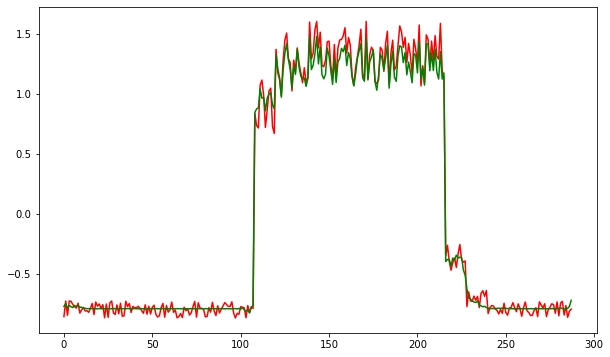

In [49]:
# Plotting the original and model data for the first day.
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0], 'r');

# 
ax.plot(x_train_pred[0], 'g');

# Both sets follow the same pattern but the original (red) appears to have more outliers

In [50]:
# Subtracting the training mean from the Daily_Jumpsup DF to carry out the same comparison we did on 'small_noise'

df_test_value = (df_daily_jumpsup - train_mean) / train_std

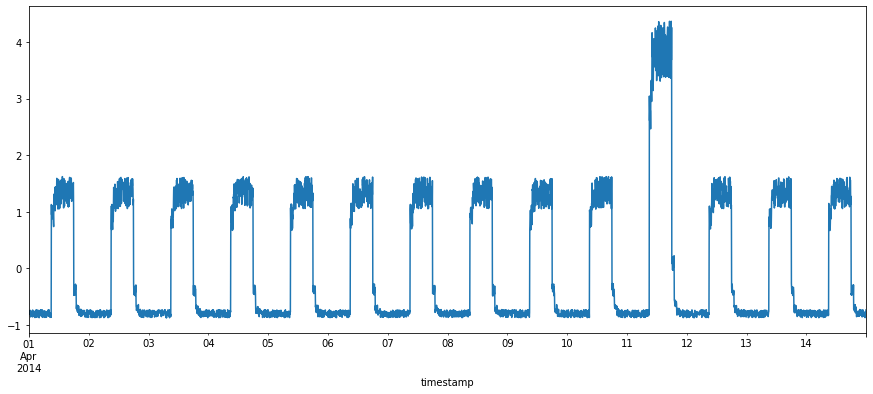

In [51]:
# 
fig, ax = plt.subplots(figsize=(15, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [52]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [53]:
# Get train MAE loss. Stands for Mean absolute error, calculated as the difference between the actual and predicted values
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 9ms/step


In [54]:
# Again, the calculation for the above for the test case
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss



array([[0.05425763],
       [0.05307989],
       [0.05568547],
       ...,
       [0.05707495],
       [0.05548533],
       [0.05703848]])

In [55]:
# Reshapes into a row.
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss



array([0.05425763, 0.05307989, 0.05568547, ..., 0.05707495, 0.05548533,
       0.05703848])

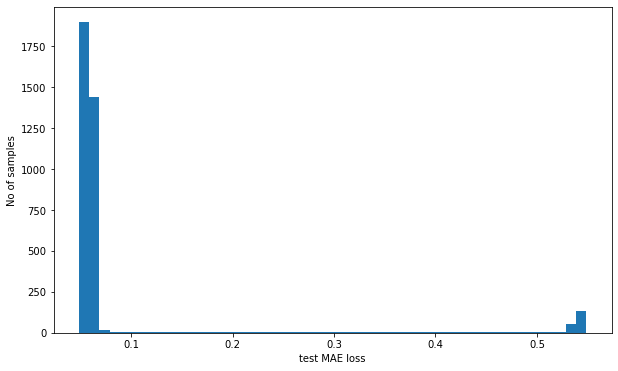

In [56]:
# Plotting the test MAE losses on histogram. Anomalies are clearly seen on the right.
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [57]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)



438

In [58]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

# Creating list of anomalies

In [59]:
# Creating a dataframe comprising of anomalies
df_subset = df_daily_jumpsup.iloc[inds]

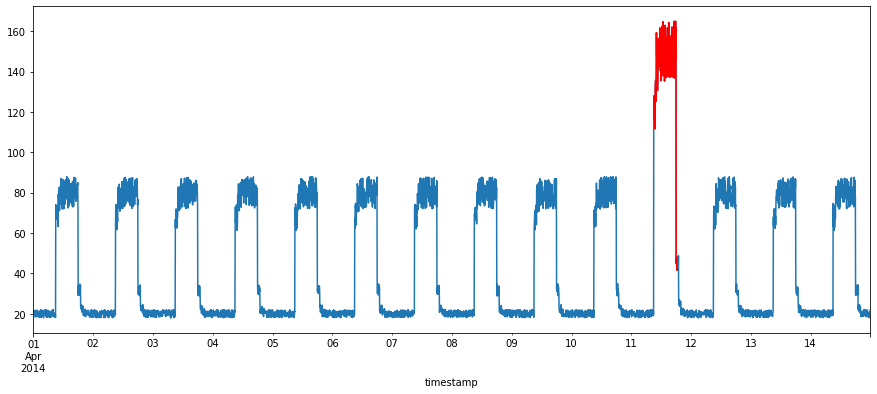

In [60]:
#
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the dataset
df_daily_jumpsup.plot(legend=False, ax=ax)

# Plotting the anomalies in red
df_subset.plot(legend=False, ax=ax, color="r");



## Conclusion & Improvements

Clunky code examples

Rounding. Make any odds?

Graphs improvements

There have been a number of changes made to the original code due to some unnecessary or 'clunky' code. This was somewhat off-putting when orignally looking at the code. An example would be in ''Loading the date''. 

The Keras code imports the files as below:

![title](img/url_orig.png)

This can be simplified somewhat to:

![title](img/url_new.png)

Removing the extra lines makes the code more 'manageable'. 

The Keras website is difficult to navigate with explanations hard to find.

Some of the code is also not suited or unnecessary for Jupyter Notebook. Example "plt.show()" is not required to show plots. This adds to the cluttered feel.

Also, the visualisation of the date could be improved by using seaborn for plotting.

## References



1)  https://keras.io/about/

2)  https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras

3)  https://towardsai.net/p/l/what-is-tensorflow-and-how-does-it-work

4)  https://www.toptal.com/machine-learning/tensorflow-machine-learning-tutorial

5)  https://www.ibm.com/topics/neural-networks

6)  https://avinetworks.com/glossary/anomaly-detection/

7)  https://www.techtarget.com/searchdatamanagement/definition/data-preprocessing

8)  https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/05-evaluation.ipynb

9)  https://keras.io/examples/timeseries/timeseries_anomaly_detection/

10) https://keras.io/api/models/model_training_apis/